# Projet Numérique 2 : Équations de Lotka Volterra
## Jérémy Perdrizet et Emmanuel Crouzet

In [1]:
#importations
import numpy as np
import matplotlib.pyplot as plt
import math 

## Q1

#### Interprétation des termes de la dynamique

$x_{1}$ désigne le nombre de proies et $x_{2}$ le nombre de prédateurs

On a l'équation $\dot{x_{1}}$ = $\alpha$ * $x_{1}$ - $\beta$ * $x_{2}$ * $x_{1}$
Le terme $\alpha$ * $x_{1}$ signifie que plus il y a de proies, plus elles ont de chance de se reproduire donc plus la population de proies  a tendance à augmenter.
Le terme - $\beta$ * $x_{2}$ signifie que plus il y a prédateurs, plus ces derniers mangent de proies donc plus la population de proies  a tendance à diminuer. Mais sa multiplication par x1 signifie de plus que lorsque la population de proies diminue, les prédateurs mangent moins de proies et donc cela adoucit la baisse de population de proies.

On a également l'équation $\dot{x_{2}}$ = - $\gamma$ * $x_{2}$ + $\delta$ * $x_{1}$ * $x_{2}$
Le terme - $\gamma$ * $x_{2}$ signifie que plus il y a de prédateurs, plus il y a de tension sur la ressource en proies, moins il y a à manger pour les prédateurs et donc plus cette population  a tendance à diminuer.
Le terme $\delta$ * $x_{1}$ signifie que plus il y a de proies, plus il y a à manger pour les prédateurs et donc plus leurs population a tendance à augmenter. Et sa multiplication par $x_{2}$ permet de prendre en compte le même effet que celui décrit par le terme alpha * $x_{1}$ : plus il y a de prédateurs, plus ils ont de chance de se reproduire et donc plus leur population a tendance à augmenter.

Les valeurs de $\alpha$, $\beta$, $\gamma$ et $\delta$ permettent d'exprimer l'intensité des phénomènes décrits précédemments.


#### Recherche de points d'équilibre

D'après le système d'équations,
$\dot{x_{1}}$=$\dot{x_{2}}$=0 $\Leftrightarrow$ ($x_{1}$,$x_{2}$) $\epsilon$ {(0,0) , (0, $\gamma$/$\delta$) , ($\alpha$/$\beta$, 0) , ($\alpha$/$\beta$, $\gamma$/$\delta$) }

Donc $\bar{x}$ ne peut être que ($\alpha$/$\beta$, $\gamma$/$\delta$)


#### Étude de la stabilité à ce stade

Posons $X$ = ($x_{1}$,$x_{2}$). 

On réécrit alors le système en $\dot{X}$ = $f(X)$. Avec $f$ : ($x_{1}$,$x_{2}$) $\mapsto$ ($x_{1}*\alpha - \beta*x_{2}, -x_{2}*(\gamma - \delta*x_{1})$


$f$ est continûment différentiable.


On calcule $J_{f}$, sa matrice jacobienne.

 $J_{f}$($x_{1}$,$x_{2}$) = \begin{pmatrix}\alpha - \beta * x_{2}  & -\beta*x_{1}\\ -\delta*x_{2} & -\gamma + \delta*x_{1} \end{pmatrix}

En (0,0), $J_{f}$(0,0) = \begin{pmatrix}\alpha & 0 \\ 0 & -\gamma \end{pmatrix}
$\alpha$ est une de  ses valeurs propres et pourtant elle est strictement positive. Donc ce point d'équilibre est instable.

En $\bar{x}$, il y a trop de paramètres pour pouvoir conclure à ce stade sur le signe des valeurs propres et donc sur la stabilité du point d'équilibre $\bar{x}$.


In [2]:
#valeurs des paramètres alpha (a) / beta (b) / gamma (c) / delta (d)
a = 0.2
b = 0.4
c = 0.3
d = 1 

# Q2

#### 1er essai : avec les valeurs précédentes

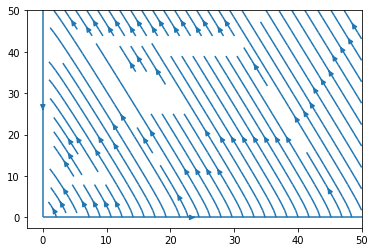

In [3]:
#code
X=np.linspace(0,50,15)
Y=np.linspace(0,50,15)
Mesh = np.meshgrid(X,Y)
MX=Mesh[0]
MY=Mesh[1]

VX = MX*(a-b*MY)
VY = -MY*(c - d*MX)
plt.streamplot(MX,MY,VX,VY)

On observe ici que le point (0,0) est un point d'équilibre instable. D'après l'allure du graphe, on peut intuiter que les solutions initialisées dans $R_{>0}* R_{>0}$ tendent vers (0,0), mais qu'une perturbation (+$\epsilon$, 0) en partant de (0,0) fait tendre $x_{1}$ vers l'infini.

#### 2ème essai : avec des valeurs particulières trouvées sur Internet

In [4]:
a = 1.5
b = 0.05
c = 0.48 
d = 0.05 

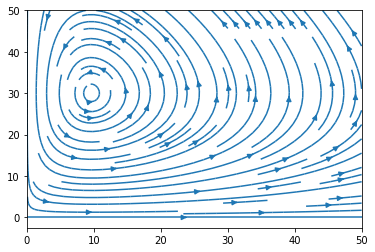

In [5]:
X=np.linspace(0,50,15)
Y=np.linspace(0,50,15)
Mesh = np.meshgrid(X,Y)
MX=Mesh[0]
MY=Mesh[1]

VX = MX*(a-b*MY)
VY = -MY*(c - d*MX)
plt.streamplot(MX,MY,VX,VY)

Ici on observe que le point (10,30) est également un point d'équilibre.

# Q3

Soit $x = \left(\begin{array}{}x_1\\x_2\end{array}\right)$ une solution initialisée sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$, $I$ son intervalle de définition.
On suppose par l'absurde que $x$ ne reste pas sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$.
Il existe alors $t_1 \in I$ tel que $x_1(t_1) = 0$ ou $x_2(t_2) = 0$ par continuité de x. Considérons le premier cas (la preuve qui suit est annalogue avec l'autre cas)
D'après le théorème de Cauchy-Lipschitz, f étant continue, il existe une unique solution maximale définie sur un intervalle compris dans I.
Or $$\begin{array}{r} g: \mathbb{R} \rightarrow \mathbb{R}^2 \\ t \rightarrow \left(\begin{array}{}0\\x_2(t_0) \exp(-\gamma (t-t_0))\end{array}\right) \end{array}$$ est solution sur I tout entier donc solution maximale. x est donc cette solution par unicité.

Mais alors $x_1(t_0)= 0$ et x n'est pas initialisé sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$ ce qui est contradictoire.

Ainsi toute solution initialisée sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$ reste sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$.


# Q4

Soit $x$ une solution maximale initialisée sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$. elle reste alors sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$ et $H$ y est $C^1$ et on peut donc calculer sa dérivée le long de $x$.
$\frac{d(H(t)))}{dt} = 0$ en utilisant le système différentiel appliqué dans le calcul de la dérivée de $H$.

On suppose par l'absurde que $x$ n'est pas défini sur $\mathbb{R}$. Considérons alors une borne $a$ d'un des intervalles dont la réunion est $I$ l'intervalle de définition de $x$. Notons cet intervalle $I_a$. On suppose que $I_a$ est ouvert en $a$

$H(x)$ est alors constant sur $I_a$, notons $k_a$ sa valeur et $H_a$ la courbe de niveau associée.
* $H_a$ est l'image réciproque d'un singleton fermé par H une fonction continue. C'est donc un fermé.
* Montrons que $H_a$ est borné. Supposons donc qu'il ne l'est pas. Pour tout $n \in \mathbb{N}$, il existe alors $x_n \in H_a$ tel que $\|x_n\| > n$.
On construit ainsi une suite dont la norme diverge. Or pour tout $n \in \mathbb{N}$, $H(x_n) = H(x_1)$.
Donc $\delta (x_{1,n}-x_{1,1}) + \beta (x_{2,n}-x_{2,1}) = \ln (\frac{x_{1,n}}{x_{1,1}}^{\gamma}\frac{x_{2,n}}{x_{2,1}}^{\alpha})$
Ainsi $\delta x_{1,n} + \beta x_{2,n} ~ \gamma \ln (x_{1,n}) + \alpha \ln (x_{2,n})$
Puis avec $u_n = \delta x_{1,n} + \beta x_{2,n}$,
$u_n = O(\ln(un))$
Or $u_n$ tend vers l'infini car la norme de $x_n$ tend vers l'infini,
Ce domination est donc impossible.
On en déduit que $H_a$ est borné. Etant un fermé borné de $\mathbb{R}^2$ un espace vectoriel de dimension finie, c'est un compact.
Soit maintenant $t_n$ une suite quelconque de $I_a$ qui converge vers $a$.
Alors $(t_n))_{n \in \mathbb{N}}$ est une suite de $H_a$ un compact. Elle admet donc une valeur d'adhérence $x_a$.
Si $y_a$ est une autre valeur d'adhérence, en notant $\Phi$ une extractrice qui mène à $x_a$ et $\Psi$ qui mène à $y_a$:
$\|x_a-y_a\| \leq \|x_a-t_{\Phi(n)})\| + \|t_{\Psi(n))}-t_{\Phi(n)})\| + \|y_a-t_{\Psi(n)})\|$

les termes de gauche et de droite tendent vers 0.

D'après l'inégalité des accroissements finis, $\|t_{\Psi(n))}-t_{\Phi(n)})\| \leq sup\{\|x'(t)\| | t \in [t_{\Phi(n)},t_{\Psi(n)}]\} |t_{\Psi(n)}-t_{\Phi(n)}|$.
Or f est continue sur $H_a$ un compact donc y est borné. Ainsi il existe $K \in \mathbb{R}$ tel que $\forall t \in I_a$, $\|x'(t)\| \leq K$.
Donc en reprenant les deux inégalités, on en déduit que le terme du milieu tend vers 0 par combinaison linéaire. Ainsi $x_a = y_a$ et
$(t_n))_{n \in \mathbb{N}}$ est une suite d'un compact admettant une unique valeur d'adhérence, donc elle converge vers une limite $x_a$. Par caractérisation séquentielle, $x$ converge en $a$, vers $x_a$. La fonction qui vaut $x$ en tout point de $I$ et qui vaut $x_a$ en $a$ est alors continue, et même $C^1$ par théorème de continuité de la dérivée (en faisant tendre la dérivée vers $a$ et à l'aide du système différentiel). elle vérifie de plus le système différentiel sur l'union de $I$ et de \{a\}. $x$ étant maximale, on en déduit qu'elle est définie en a. Toute borne est donc fermée.

Cette borne étant fermée, d'après le théorème de Peano-Arzelà, il existe une boule ouverte de centre $a$ et de rayon $r$ strictement positif sur laquelle une solution $x_r$ existe. Puis d'après le théorème de Cauchy-Lipschitz appliqué à la condition initiale en a, $x$ coincide avec cette solution sur l'intersection de la boule et de I. Le prolongement de $x$ par $x_r$ sur le reste de la boule est alors solution. Par maximalité, $x$ y est définie et $a$ n'est pas une borne.

Ainsi toute solution initialisée sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$


# Q5

In [6]:
#on introduit la fonction H
def H(x1, x2):
    return d*x1-c*np.log(x1)+b*x2-a*np.log(x2)

In [7]:
# ainsi que la fonction display contour utilisée dans le projet précédent pour afficher les courbes de niveau
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)

<ipython-input-6-6091cb443f84>:3: RuntimeWarning: divide by zero encountered in log
  return d*x1-c*np.log(x1)+b*x2-a*np.log(x2)


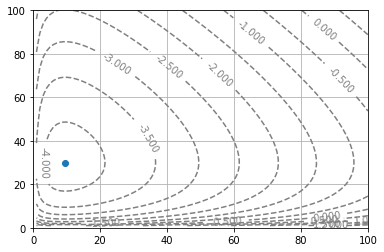

In [8]:
display_contour(H, np.linspace(0, 100, 100), np.linspace(0, 100, 100), levels=15)
#on affiche les courbes de niveau de H

plt.scatter(c/d,a/b) #on affiche "x barre" (gamma/delta, alpha/beta)

On observe que $\overline{x}$ est (comme sur le portait de phase) au centre des courbes de niveau et on peut même intuiter graphiquement que c'est un minimum de H. 

D'après la question 4, les solutions restent chacune sur une ligne de niveau de H et on remarque que ces lignes de niveau sont fermées. Donc les solutions sont périodiques et bornées. 

On constate graphiquement que tout cercle de $\overline{x}$ de rayon strictement positif  $\varepsilon$ englobe entièrement au moins une courbe de niveau de H. Donc si on choisit un point éloigné  $\varepsilon$ de $\overline{x}$, la solution maximale passant par ce point restera arbitrairement proche de $\overline{x}$ (elle sera, au pire, sur la courbe de niveau la plus éloigné de $\overline{x}$ qui est entièrement contenue dans le cercle de rayon $\varepsilon $). Cela signifie, par définitionn que $\overline{x}$ est stable.


# Q6

In [37]:
#code
def solve_euler_explicit(f, x0, dt, t0, tf):
    X=[np.array(x0),] #vecteur numpy pour l'addition
    T=[t0,]
    t=t0
    x=X[0] 
    while t <= tf-dt: #ainsi le dernier élément de T est inférieur ou égal à tf
        x = x + dt*f(t,x) #schéma d'Euler explicite
        t += dt
        X.append(x)
        T.append(t)
    return np.array(T), np.array(X)

On teste l'algorithme sur l'équation d'un oscillateur harmonique de pulsation w et d'amplitude Xm

In [38]:
w = 2 #pulsation
Xm =10 #amplitude
x0 = (10,0)
t0 = 0
tf = 10

#l'équa diff est x''+w**2*x=0 avec x(0)=Xm et x'(0)=0
#on note f0 la fonction telle que (x,x')' = f(x,x')
def f0(t,x):
    return np.array([x[1],-w**2*x[0]])

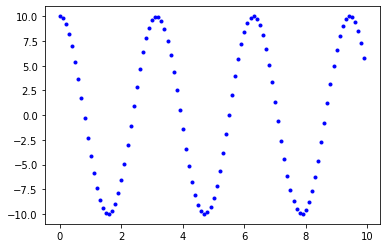

In [39]:
#sachant que la solution exacte à ce problème de Cauchy est x(t) = Xm*cos(wt)
# c'est à dire 
T = np.arange(0,10,0.1)
X=[]
for t in T :
    X.append(Xm*math.cos(w*t))
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

Visualisons le portrait de phase (qui doit être une ellipse) et l'évolution temporelle pour trois pas dt différents : 0.1 / 0.01 / 0.005

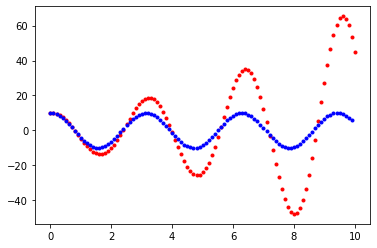

In [40]:
dt = 0.1 
L = solve_euler_explicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

On constate que l'amplitude augmente

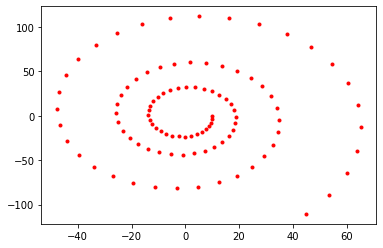

In [41]:
#le portrait de phase pour dt=0.1
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase

Cela rappelle un oscillateur sous amorti

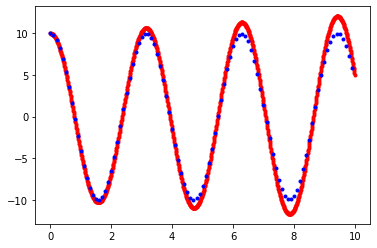

In [42]:
dt=0.01
L = solve_euler_explicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

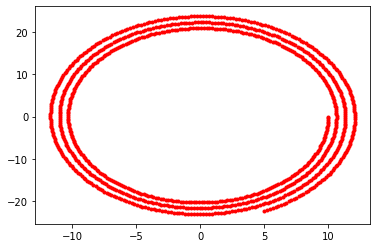

In [43]:
#le portrait de phase pour dt=0.01
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase

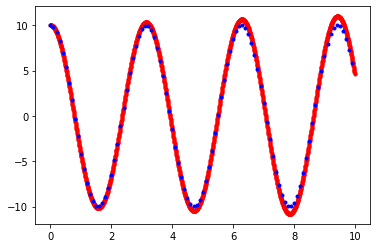

In [44]:
dt = 0.005
L = solve_euler_explicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

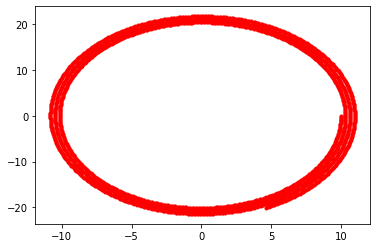

In [45]:
#le portrait de phase pour dt=0.005
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase

#### Conclusion
On observe bien ici la convergence du schéma lorsque dt tend vers 0

### Visualiser graphiquement l’ordre de convergence 

Pour visualiser graphiquement l'ordre de convergence, nous allons tracer l'erreur (maximale) entre la solution obtenue par le schéma d'Euler et la solution exacte (ici ce sera s : t $\to X_{m}cos(w*t)$) en fonction de dt.

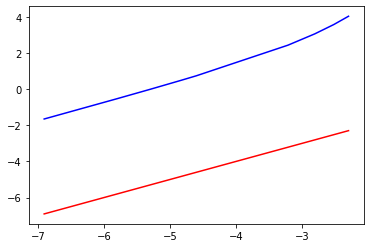

In [48]:

erreur = []
DT = [0.1, 0.08, 0.06, 0.04 ,0.01, 0.008, 0.005, 0.003, 0.001]
for dt0 in DT:
    L = solve_euler_explicit(f0, x0, dt0, t0, tf)
    Y0 =[]
    X0 = []
    for i in range(len(L[0])):
        X0.append(Xm*math.cos(w*(t0 + i*dt0)))
        Y0.append(L[1][i][0])
    erreur.append(max(abs(np.array(X0)-np.array(Y0))))

#
    
plt.plot(np.log(DT),np.log(erreur),'b')
plt.plot(np.log(DT),np.log(DT),'r')

On a tracé l'erreur en fonction de $dt$ en échelle logarithmique (en bleu) car la pente, lorsque $dt \to 0$, donne alors directement l'ordre de convergence. On a également tracé en échelle logarithmique la fonction identité (en rouge).

La comparaison de ces 2 courbes pour $dt$ proche de 0 permet de conclure que le schéma d'Euler explicite possède un ordre de convergence égal à 1.

# Q7 

On introduit la fonction $fpb$ qui traduit le système des équations de Lotka-Volterra

In [19]:
#on utilise les valeurs particulières précédentes
a = 1.5
b = 0.05
c = 0.48 
d = 0.05 

#fonction
def fpb(t,x):
    x1, x2 = x
    return np.array([x1*(a-b*x2), -x2*(c-d*x1)])

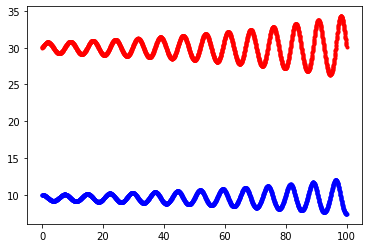

In [20]:
# en partant du point d'équilibre précédent
x0 = (10,30)
dt = 0.05
tf = 100
L0 = solve_euler_explicit(fpb, x0, dt, t0, tf)

for i in range(len(L0[0])):
    plt.plot(L0[0][i],L0[1][i][0],'b.') # x1 / proies, en bleu
    plt.plot (L0[0][i],L0[1][i][1],'r.') # x2 / les prédateurs, en rouge

On constate que la solution oscille autour de (10,30) mais qu'au temps long elle se met à diverger.

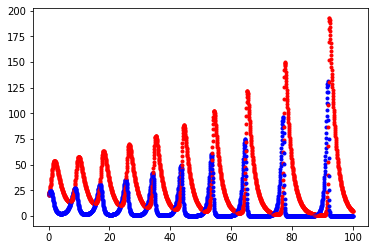

In [21]:
#en partant d'un autre point 
x0 = (20,20)
L = solve_euler_explicit(fpb, x0, dt, t0, tf)

for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'b.') # x1 / proies, en bleu
    plt.plot (L[0][i],L[1][i][1],'r.') # x2 / les prédateurs, en rouge

On retrouve ici la répétition d'un motif périodique : ce qui est plutôt réaliste pour décrire l'évolution de 2 populations dépendantes. 

Cependant, on remarque aussi que les populations prennent des valeurs extrêmes (le maximum du nombre de prédateurs semble tendre vers l'infini et les populations de proies ou de prédateurs frôlent souvent le 0)  :  ce qui ne nous semble pas du tout réaliste.

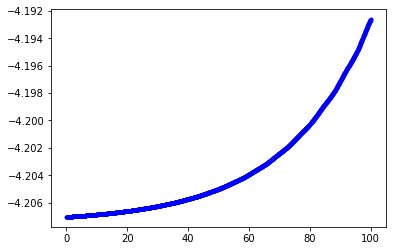

In [22]:
#tracé de H en partant de x0 = (10, 30)
for i in range(len(L0[0])):
    plt.plot(L0[0][i],H(L0[1][i][0],L0[1][i][1]),'b.') 

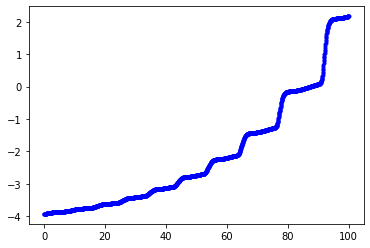

In [23]:
#idem en partant de x0 = (20,20)
for i in range(len(L[0])):
    plt.plot(L[0][i],H(L[1][i][0],L[1][i][1]),'b.') 

On constate bien que H n'est pas constante : ce qui confirme que la solution obtenue par le schéma d'Euler explicite n'est pas satisfaisante (notamment aux temps longs, où H croît exponentiellement). On ne peut donc pas directement conclure sur le réalisme des solutions aux équations de Lotka Volterra car on n'observe ici des courbes qui s'en éloignent (surtout aux temps longs). En conclusion : ce qu'on observe n'est pas réaliste aux temps longs.

# Q8 

Le schéma d'Euler implicite est le suivant $x_{j+1}=x_{j}+dt*f(t_{j+1},x_{j+1})$

Pour tout j, connaissant $x_{j}$, on approche $x_{j+1}$ comme le point fixe de l'application application $F_{j} : y \mapsto  x_{j} + dt*f(t{j+1},y)$

(le point fixe existe par application du théorème de Banach)

On initialise ensuite en prenant $x_{j+1}$(k=0)= $x_{j} + dt*f(t,x_{j})$ c'est-à-dire le point $x_{j}$ trouvé par Euler explicite.

On itère sur k avec la relation  $x_{j+1}(k+1)=F_{j}(x_{j+1}(k))$

Enfin, lorsque la variation relative est inférieure à un certain $epsilon$ (que l'on a ici fixé à 0.001) i.e. lorsque : abs(($x_{j+1}(k+1)-x_{j+1}(k))/x_{j+1}(0)) < epsilon$, on s'arrête et on a alors bien approché $x_{j+1}$

Sinon, on s'arrête au bout de $itermax$ itérations et on prend la dernière valeur ($x_{j+1}(itermax)$) comme valeur de $x_{j+1}$. 

In [24]:
#on fixe epsilon 
epsilon = 10**-3

#code
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100) :
    #initialisation
    t=t0
    T=[t,] 
    x_0 = np.array(x0)
    X=[x_0,] #liste des valeurs finales/conservées pour x
    j = 0
    #boucle sur j
    while t+dt <= tf:
        
        def F_j(x):
            return X[j] + dt*f(t+dt,x)
        #initialisation pour la boucle sur k
        x_j_0 = X[j] + dt*f(t,X[j]) #partons de la valeur de x_j+1 obtenue par Euler explicite
        k = 0
        x_j_k = X[j] + dt*f(t,X[j])
        #on notera x_j_k_p_1 pour "x_j à la k+1 ième itération de l'algorithme du point fixe" 
        
        #boucle sur k, à j fixé
        while k < itermax:
            x_j_k_p_1 = F_j(x_j_k)
            if k == itermax : #si on arrive au nombre max d'itérations,
                X.append(x_j_k_p_1) #on choisit de se contenter de la dernière valeur (pour x_j+1)
                
            if np.all(abs((x_j_k_p_1-x_j_k)) < epsilon*abs(x_j_0)): #on considère que ça a convergé (vers x_j+1) 
                                                        #quand toutes  les coordonnées sont proches (d'où le np.all)
                X.append(x_j_k_p_1)
                break

            else:
                k += 1
                
            x_j_k = x_j_k_p_1 #on va passer à la prochaine itération du coup on "redescend" l'indice

        t = t + dt #on passe à t_j+1
        T.append(t) # et on le fait rentrer dans T
        j += 1 # on passe x_j+1 
    return np.array(T), np.array(X)

#### Test de convergence sur le même exemple de l'oscillateur harmonique pour dt = 0.1 puis dt = 0.01 puis dt = 0.005

In [25]:
w = 2 #pulsation
Xm =10 #amplitude
x0 = (10,0)
t0 = 0
tf = 10

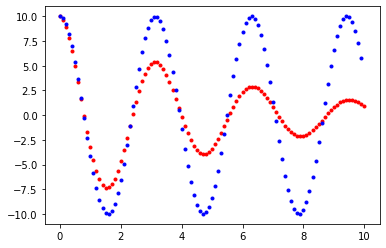

In [26]:
dt = 0.1 

L = solve_euler_implicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

On constate que l'amplitude diminue

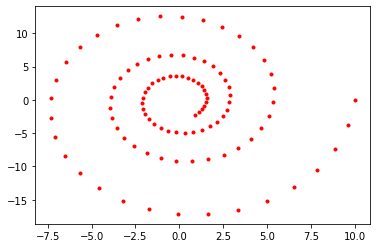

In [27]:
#le portrait de phase pour dt=0.1
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase

Cela rappelle un oscillateur amorti (le point de départ est (10,0), tout à droite)

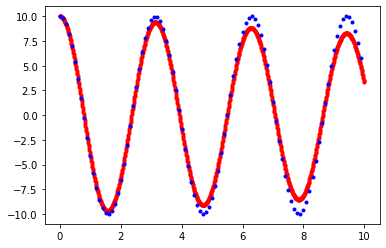

In [28]:
dt = 0.01

L = solve_euler_implicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

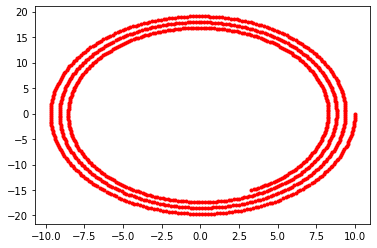

In [29]:
#le portrait de phase pour dt=0.01
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase


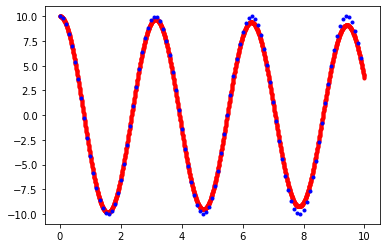

In [30]:
dt = 0.005

L = solve_euler_implicit(f0, x0, dt, t0, tf)
for i in range(len(L[0])):
    #plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase
    plt.plot(L[0][i],L[1][i][0],'r.') #pour le tracé de la solution en fonction du temps
for i in range(len(T)):
    plt.plot(T[i],X[i], 'b.')

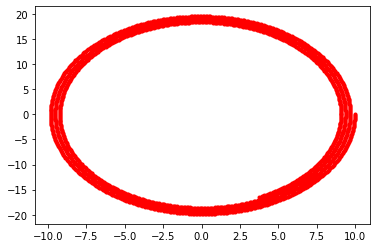

In [31]:
#le portrait de phase pour dt=0.005
for i in range(len(L[0])):
    plt.plot(L[1][i][0],L[1][i][1],'r.')  #pour le tracé des portraits de phase

#### Conclusion 
On observe, comme dans le cas du schéma d'Euler explicite, la convergence lorsque dt tend vers 0.

### Application aux équations de Lotka-Volterra

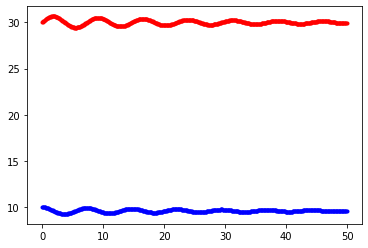

In [32]:
#condition initiale x0 = (10,30) (point d'équilibre)
x0 = (10,30)

dt = 0.1

L0=solve_euler_implicit(fpb,x0,dt,0,50)

for i in range(len(L0[0])):
    plt.plot(L0[0][i],L0[1][i][0],'b.') 
    plt.plot (L0[0][i],L0[1][i][1],'r.')

Cette fois on observe bien la convergence des solutions vers le point d'équilibre.

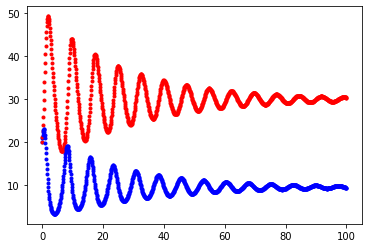

In [33]:
#en partant de (20,20)
x0 = (20,20)

dt = 0.1

L=solve_euler_implicit(fpb,x0,dt,0,100)

for i in range(len(L[0])):
    plt.plot(L[0][i],L[1][i][0],'b.') 
    plt.plot (L[0][i],L[1][i][1],'r.')

Même observation ici.

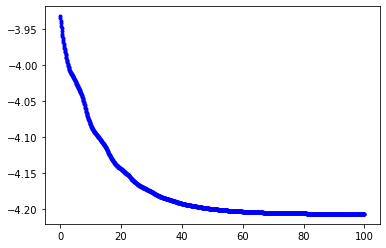

In [34]:
# tracé de H pour une solution initialisée à (20,20)
for i in range(len(L[0])):
    plt.plot(L[0][i],H(L[1][i][0],L[1][i][1]),'b.')

 On observe cette fois que H converge exponentiellement vers une constante.

#### Conclusion 
Le schéma d'Euler implicite fournit des solutions qui, aux temps longs, sont plus proches des solutions exactes (convergence de H vers une constante) et qui nous semblent réalistes (pas de variations extrêmes de la population).

# Q9 

Soit $x$ une solution de Lotka-Volterra sur $I$,
$H$ étant constante sur $I)$ car de dérivée nulle d'après la question 4,
on a pour tout $t \in I$: $H(t)) = H(t_0))$
Ainsi le terme de droite du nouveau système est nul et $x$ est solution du nouveau système.
Réciproquement, si $x$ est une solution du nouveau système sur un intervalle :
$f$ étant continue sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$, on a d'après le théorème de Cauchy-Lipschitz qu'il existe une unique solution $x_1$ à Lotka-Volterra sur $I$ telle que $x_1(t_0)=t_0)$
Or d'après ce qui précède, $x_1$ est solution du nouveau système sur I.en réappliquant le théorème de Cauchy-Lipschitz au nouveau système, on en déduit que $x$ et $x_1$ coïncident sur $I$. $x$ est donc solution de Lotka-Volterra.

# Q10

$\frac{d}{dt}(H(t))-H_0) = -u_1(x)(H(t))-H_0)(\delta - \frac{\gamma}{x_1}) -u_2(H(x)-H_0)(\beta - \frac{\alpha}{x_2}) = -\langle u(t)) , \nabla H(t)) \rangle (H(t))-H_0)$
Ainsi en posant $u = -k \nabla H$, on a $u$ continuement différentiable car $H$ est $C^înfini$ sur $\mathbb{R}_{> 0} \times \mathbb{R}_{> 0}$ et:
$\frac{d}{dt}(H(t))-H_0) = -k \| \nabla H(t)) \|^2  (H(t))-H_0)$
$(H(t))-H_0)$ est donc de la forme $A \exp(-k\int_{t_0}^t \| \nabla H(u)) \|^2 du)$ avec $A$ un réel (qui vaut H(x_0)-H_0)
or par hypothèse x reste à une distance $d$ strictement positive de $\overline{x}$.
Donc $ | x_1 - \frac{\gamma}{\delta} | > \frac{d}{2}$ ou $ | x_2 - \frac{\alpha}{\beta} | > \frac{d}{2}$. Traitons par exemple le premier cas:
Soit $M > 0$ tel que $M < \frac{\gamma}{\delta}$
*Si $x_1 < M$:
$$\|\nabla H(t))\|^2 \ge (\frac{\gamma}{M}-\delta)^2 = \epsilon_1$$
*Sinon:
$$\|\nabla H(t))\|^2 \ge (\frac{\delta x_1 - \gamma}{x_1})^2 \ge \frac{(\delta d)^2}{4 M^2} = \epsilon_2$$
Ainsi avec $\alpha = min(\epsilon_1,\epsilon_2)$:
$$\|\nabla H(t))\|^2 \ge \alpha$$ et $\alpha > 0$
On obtient de la même manière une autre constante en considérant l'autre cas on ne perd donc pas de généralité.
Puis $H(t)) - H_0 = (H(0)) - H_0) \exp(-k\int_0^t \|\nabla H(u))\|^2 du) \leq (H(0)) - H_0) \exp(-k \alpha t)$
Donc $H(t))$ converge exponentielement vers $H_0$ en l'infini.

# Q11

De ce qui précède, on va donc d'implanter le schéma d'Euler avec $u = \nabla H$ pour assurer la stabilité de H.
Par développement limité au premier ordre en $dt$

$H(x_{j+1}(t)) = H(x_j(t+dt)) = H(x_j(t)) + dt \times \frac{d}{dt} H(x_j(t))$

Donc d'après la question 10 :

$H(x_{j+1}(t+dt)) - H(x_0) = H(x_j(t)) - H(x_0) - dt \times k \| \nabla H(t))\|^2 (H(x_j(t)-H_0))$

Ainsi:

$H(x_{j+1}) - H(x_0) = (H(x_j)-H(x_0)) (1- dt \times k \| \nabla H(x_j)) \|^2)$

On cherche $H(x_{j+1}) - H(x_0) ~ (H(x_j)-H(x_0))$ donc $k \| \nabla H(x_j) \|^2$ doit être suffisamment petit.
En même il ne faudra pas choisir $k$ trop petit, pour assurer une convergence rapide.



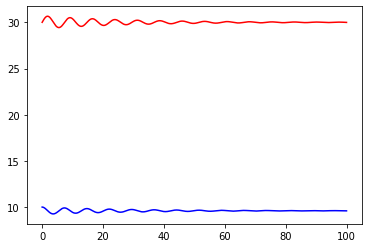

In [35]:

k = 1


def f2(t,X) :
    return (np.array([X[0]*(a-b*X[1]) - k*(d - c/X[0])*(H(X[0],X[1]) - H0),
                     -X[1]*(c-d*X[0]) - k*(b - a/X[1])*(H(X[0],X[1]) - H0)]))

H0 = H(10,30)
x0 = (10,30)

L = solve_euler_implicit(f2,x0,dt,0,100)
x1 = [L[1][i,0] for i in range(len(L[1]))]
x2 = [L[1][i,1] for i in range(len(L[1]))]

plt.plot(L[0],x1,'b')
plt.plot(L[0],x2,'r')



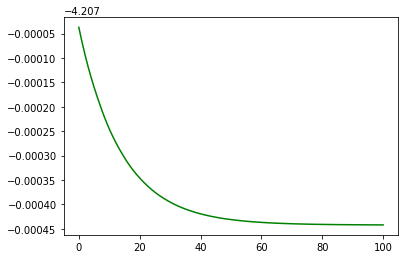

In [36]:
P2=H(np.array(x1),np.array(x2))

plt.plot(L[0],P2,'g')

### Conclusion
Le tracé de H (en vert) montre que cette dernière est quasiment constante (car ses variations sont très faibles) sur l'entiereté de l'intervalle de temps (arbitrairement long) choisi. On en conclu qu'on observe là les solutions (quasi) exactes des équations de Lotka-Volterra.